### Now we define the Dataset and the Dataloader classes from pytorch

In [22]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [8]:
class CustomDataset(Dataset):
    def __init__(self, images_path, labels_path, transform=None, target_transform=None):
        self.X = np.load(images_path)
        self.y = np.load(labels_path)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        image = self.X[idx, :, :]
        label = self.y[idx]

        #convert to torch tensor
        image = torch.tensor(image, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)

        return image, label

In [9]:
images_path = "../data/processed/all_train_data.npy"
labels_path = "../data/processed/all_train_labels.npy"

#### load the dataset

In [10]:
train_data = CustomDataset(images_path, labels_path)

In [21]:
x_sample, y_sample = train_data.__getitem__(4) #display a random sample
print(x_sample)
print(y_sample)
print(f"Dataset length is {train_data.__len__()}")

tensor([[0.0135, 0.0074, 0.0147,  ..., 0.0025, 0.0086, 0.0172],
        [0.0037, 0.0012, 0.0110,  ..., 0.0086, 0.0037, 0.0061],
        [0.0074, 0.0123, 0.0135,  ..., 0.0147, 0.0061, 0.0184],
        ...,
        [0.0037, 0.0184, 0.0110,  ..., 0.0135, 0.0086, 0.0208],
        [0.0123, 0.0135, 0.0086,  ..., 0.0086, 0.0135, 0.0061],
        [0.0110, 0.0147, 0.0086,  ..., 0.0172, 0.0159, 0.0037]])
tensor(0)
Dataset length is 30000


#### Use the Dataloader wrapper

In [19]:
train_dataloader = DataLoader(train_data, batch_size=16, shuffle=True)

Feature batch shape: torch.Size([16, 150, 150])
Labels batch shape: torch.Size([16])


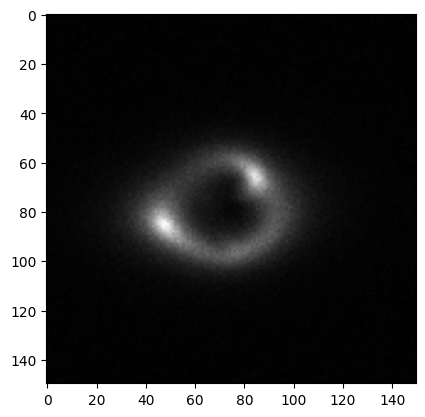

Label: 2


In [29]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")